# Project Starter


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    log_loss
)

In [50]:
# Load dataset
df = pd.read_csv('data/processed/thyroid_cleaned.csv')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,target,mapped_target,target_code
0,-1.221934,0.0,0,0,0,0,0,0,0,1,...,0,-0.122171,0,-0.076501,0,-0.10664,0,0,Normal,2
1,-1.221934,0.0,0,0,0,0,0,0,0,0,...,1,0.533224,0,-0.076501,0,-0.10664,0,0,Normal,2
2,-0.587190,0.0,0,0,0,0,0,0,0,0,...,0,-0.122171,0,-0.076501,0,-0.10664,1,0,Normal,2
3,-0.851667,0.0,0,0,0,0,0,0,0,0,...,0,-0.122171,0,-0.076501,0,-0.10664,1,0,Normal,2
4,-1.063248,0.0,0,0,0,0,0,0,0,0,...,0,-0.122171,0,-0.076501,0,-0.10664,1,3,Other,3


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   float64
 1   sex                  9172 non-null   float64
 2   on_thyroxine         9172 non-null   int64  
 3   query_on_thyroxine   9172 non-null   int64  
 4   on_antithyroid_meds  9172 non-null   int64  
 5   sick                 9172 non-null   int64  
 6   pregnant             9172 non-null   int64  
 7   thyroid_surgery      9172 non-null   int64  
 8   I131_treatment       9172 non-null   int64  
 9   query_hypothyroid    9172 non-null   int64  
 10  query_hyperthyroid   9172 non-null   int64  
 11  lithium              9172 non-null   int64  
 12  goitre               9172 non-null   int64  
 13  tumor                9172 non-null   int64  
 14  hypopituitary        9172 non-null   int64  
 15  psych                9172 non-null   i

# Data preparation


In [52]:
X = df.drop(columns=["target"])
y = df["target"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [54]:
cat_cols = X.select_dtypes(include=["object", "category"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
    ]
)

In [56]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1": f1_score(y_test, y_pred, average="weighted"),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
    }

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)

        results["Log Loss"] = log_loss(y_test, y_prob)

        results["ROC AUC"] = roc_auc_score(
            y_test,
            y_prob,
            multi_class="ovr",
            average="weighted"
        )
        
        results["Classification Report"] = classification_report(
            y_test, y_pred, output_dict=True
        )

    return results

# Model Training & Testing

### Logistic Regression


In [57]:
log_reg = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

logistic_results = evaluate_model(log_reg, X_train, X_test, y_train, y_test)

### Ridge Classifier


In [58]:
ridge = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RidgeClassifier(alpha=1.0))
])

ridge_results = evaluate_model(ridge, X_train, X_test, y_train, y_test)

### Lasso


In [59]:
lasso = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(
        penalty="l1",
        solver="saga",
        max_iter=5000
    ))
])

lasso_results = evaluate_model(ridge, X_train, X_test, y_train, y_test)

### K-Nearest Neighbours (KNN)


In [60]:
knn = Pipeline([
    ("preprocessing", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

knn_results = evaluate_model(knn, X_train, X_test, y_train, y_test)

### Support Vector Machine (SVM)


In [61]:
SVM = Pipeline([
    ("preprocessing", preprocessor),
    ("model", SVC(kernel='rbf', probability=True))
])

svm_results = evaluate_model(SVM, X_train, X_test, y_train, y_test)

### Decision Tree


In [62]:
dt = Pipeline([
    ("preprocessing", preprocessor),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42))
])

dt_results = evaluate_model(dt, X_train, X_test, y_train, y_test)

### Naive Bayes


In [63]:
nb = Pipeline([
    ("preprocessing", preprocessor),
    ("model", GaussianNB())
])

nb_results = evaluate_model(nb, X_train, X_test, y_train, y_test)

### Random Forest


In [64]:
rf = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42))
])

rf_results = evaluate_model(rf, X_train, X_test, y_train, y_test)

### Gradient Boosting


In [65]:
gb = Pipeline([
    ("preprocessing", preprocessor),
    ("model", GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42))
])

gb_results = evaluate_model(gb, X_train, X_test, y_train, y_test)    

# Model Training and Testing Summary

The table below summarizes the performance of all trained supervised learning models.
Confusion matrices are excluded here to focus on scalar evaluation metrics suitable for comparison.

In [66]:
results_df = pd.DataFrame({
    "Logistic": logistic_results,
    "Ridge": ridge_results,
    "Lasso": lasso_results,
    "KNN": knn_results,
    "SVM": svm_results,
    "Decision Tree": dt_results,
    "Naive Bayes": nb_results,
    "Random Forest": rf_results,
    "Gradient Boosting": gb_results
}).T

results_df

,Accuracy,Precision,Recall,F1,Confusion Matrix,Log Loss,ROC AUC,Classification Report
Logistic,0.999455,0.999459,0.999455,0.999456,"[[1354, 0, 1, 0], [0, 48, 0, 0], [0, 0, 133, 0...",0.002554,1.0,"{'0': {'precision': 1.0, 'recall': 0.999261992..."
Ridge,1.0,1.0,1.0,1.0,"[[1355, 0, 0, 0], [0, 48, 0, 0], [0, 0, 133, 0...",NaN,NaN,NaN
Lasso,1.0,1.0,1.0,1.0,"[[1355, 0, 0, 0], [0, 48, 0, 0], [0, 0, 133, 0...",NaN,NaN,NaN
KNN,0.974932,0.975272,0.974932,0.974562,"[[1352, 0, 2, 1], [1, 44, 2, 1], [12, 0, 121, ...",0.198733,0.99235,"{'0': {'precision': 0.9712643678160919, 'recal..."
SVM,0.99564,0.995647,0.99564,0.995615,"[[1353, 0, 1, 1], [2, 45, 0, 1], [0, 0, 133, 0...",0.013421,0.999964,"{'0': {'precision': 0.9963181148748159, 'recal..."
Decision Tree,1.0,1.0,1.0,1.0,"[[1355, 0, 0, 0], [0, 48, 0, 0], [0, 0, 133, 0...",0.0,1.0,"{'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc..."
Naive Bayes,1.0,1.0,1.0,1.0,"[[1355, 0, 0, 0], [0, 48, 0, 0], [0, 0, 133, 0...",0.0,1.0,"{'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc..."
Random Forest,1.0,1.0,1.0,1.0,"[[1355, 0, 0, 0], [0, 48, 0, 0], [0, 0, 133, 0...",0.002223,1.0,"{'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc..."
Gradient Boosting,1.0,1.0,1.0,1.0,"[[1355, 0, 0, 0], [0, 48, 0, 0], [0, 0, 133, 0...",0.0,1.0,"{'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc..."


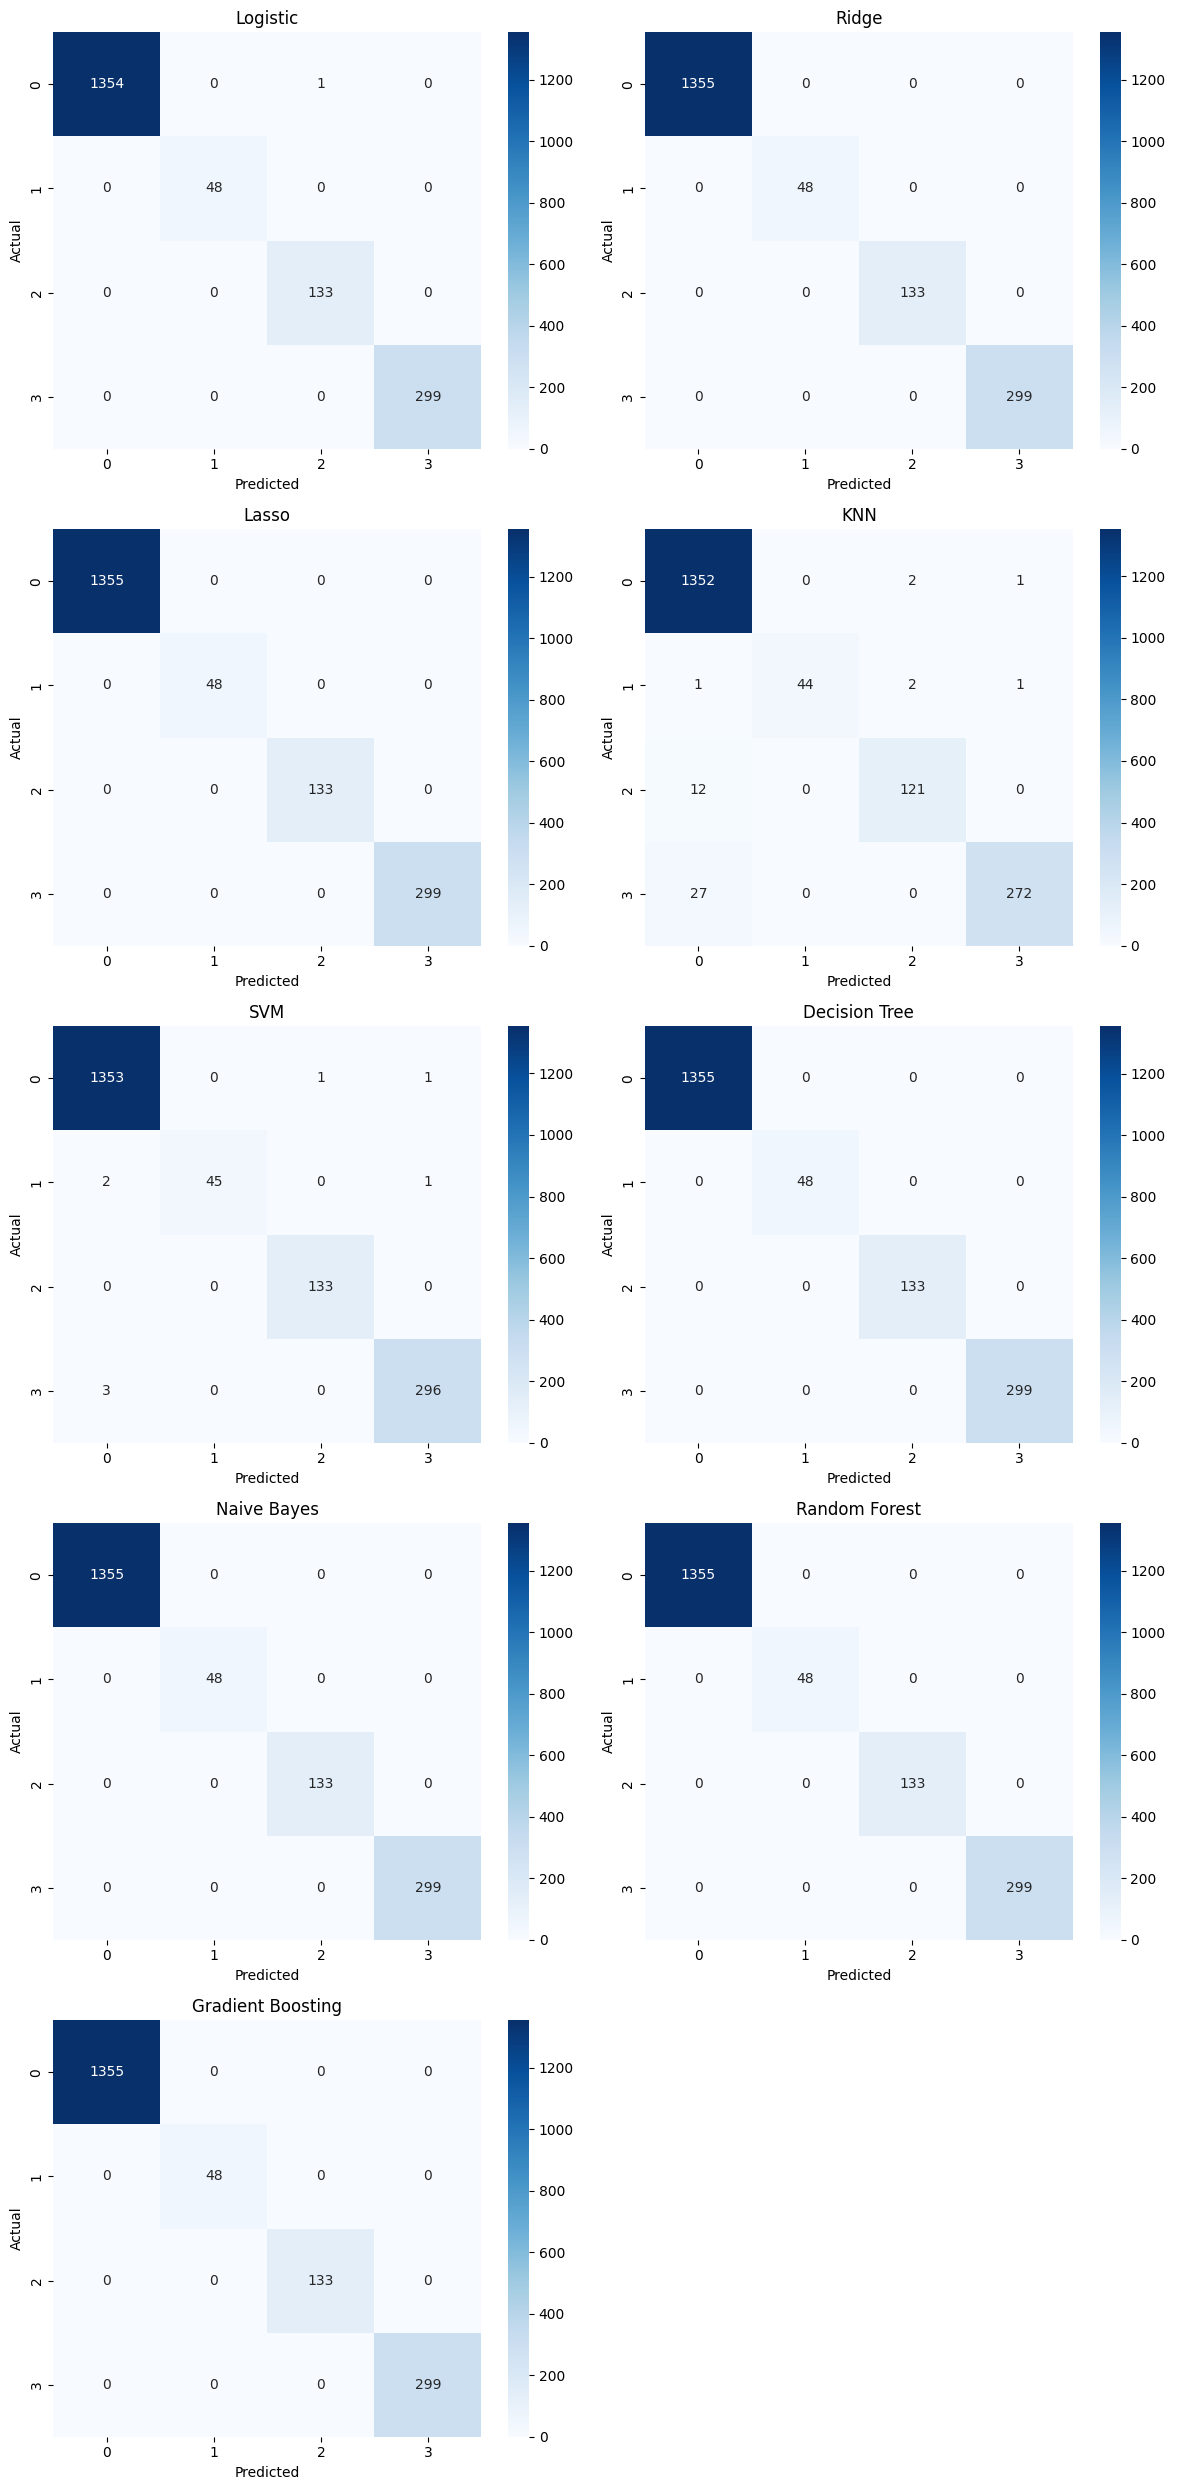

In [67]:
# Extract confusion matrices and model names
conf_matrices = results_df["Confusion Matrix"]
model_names = results_df.index

n = len(conf_matrices)
cols = 2  # number of plots per row
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
axes = axes.flatten()

for i, (cm, name) in enumerate(zip(conf_matrices, model_names)):
    sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues")
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Hide any extra axes
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [68]:
metrics_df = results_df.drop(columns=["Confusion Matrix"], errors="ignore")
metrics_df = metrics_df.apply(pd.to_numeric, errors='coerce')

metrics_df

,Accuracy,Precision,Recall,F1,Log Loss,ROC AUC,Classification Report
Logistic,0.999455,0.999459,0.999455,0.999456,2.553888e-03,1.000000,NaN
Ridge,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
Lasso,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
KNN,0.974932,0.975272,0.974932,0.974562,1.987326e-01,0.992350,NaN
SVM,0.995640,0.995647,0.995640,0.995615,1.342082e-02,0.999964,NaN
Decision Tree,1.000000,1.000000,1.000000,1.000000,2.220446e-16,1.000000,NaN
Naive Bayes,1.000000,1.000000,1.000000,1.000000,2.220446e-16,1.000000,NaN
Random Forest,1.000000,1.000000,1.000000,1.000000,2.223216e-03,1.000000,NaN
Gradient Boosting,1.000000,1.000000,1.000000,1.000000,1.543906e-08,1.000000,NaN


### Model Ranking by F1 Score

F1-score is selected as the primary evaluation metric because it balances precision and recall,
which is critical in medical diagnosis tasks where both false positives and false negatives matter.

In [69]:
metrics_df.sort_values(by="F1", ascending=False)

,Accuracy,Precision,Recall,F1,Log Loss,ROC AUC,Classification Report
Ridge,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
Random Forest,1.000000,1.000000,1.000000,1.000000,2.223216e-03,1.000000,NaN
Lasso,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
Naive Bayes,1.000000,1.000000,1.000000,1.000000,2.220446e-16,1.000000,NaN
Decision Tree,1.000000,1.000000,1.000000,1.000000,2.220446e-16,1.000000,NaN
Gradient Boosting,1.000000,1.000000,1.000000,1.000000,1.543906e-08,1.000000,NaN
Logistic,0.999455,0.999459,0.999455,0.999456,2.553888e-03,1.000000,NaN
SVM,0.995640,0.995647,0.995640,0.995615,1.342082e-02,0.999964,NaN
KNN,0.974932,0.975272,0.974932,0.974562,1.987326e-01,0.992350,NaN


### Visual Comparison

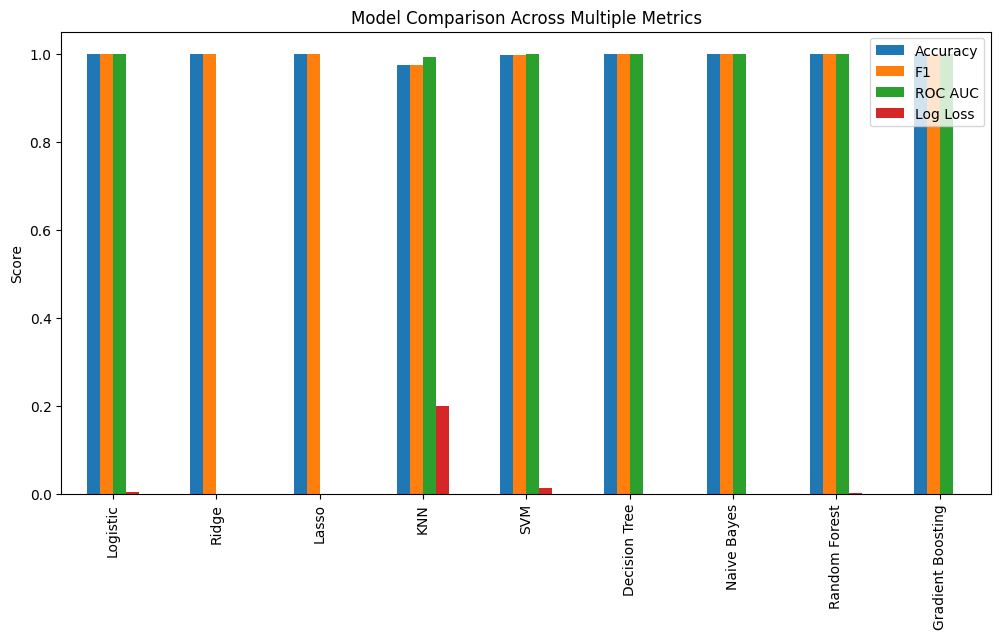

In [78]:
metrics_to_plot = ["Accuracy", "F1", "ROC AUC", "Log Loss"]
metrics_df[metrics_to_plot].plot(kind="bar", figsize=(12,6))

plt.title("Model Comparison Across Multiple Metrics")
plt.ylabel("Score")
plt.show()

### Final Model Selection

- If you need highest predictive performance → Gradient Boosting or Random Forest.
- If you need interpretable coefficients / sparse features → Lasso Logistic Regression.
- Avoid KNN if probability calibration is important.

Essentially, any of GB, RF, or Lasso would be justified depending on whether you prioritize interpretability or pure performance.